<a href="https://colab.research.google.com/github/priyanshgupta1998/Machine_learning/blob/master/Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Basket
###Transactions from a bakery

`The dataset consists of 21293 observations from a bakery. The data file contains four variables, Date, Time, Transaction ID and Item. Transaction ID ranges from 1 through 9684. However, there are some skipped numbers in Transaction IDs. Also, there are duplicated entries, as shown in observation # 2 and #3. Besides, the Item contains "Adjustment", "NONE", and "Afternoon with the baker". While the entries of "Adjustment" and "NONE" are straight forward, "Afternoon with the baker" may be a real purchase.`

###Primer on Apriori Algorithm & Association Rules
`Apriori algorithms is a data mining algorithm used for mining frequent itemsets and relevant association rules. It is devised to operate on a database that contain transactions -like, items bought by a customer in a store.`

`An itemset can be considered frequent if it meets a user-specified support threshold. For example, if the support threshold is set to 0.5(50%), a frequent itemset is a set of items that are bought/purchased together in atleast 50% of all transactions.`

`Association rules are a set of rules derived from a database, that can help determining relationship among variables in a large transactional database.`

For example, let I ={i(1),i(2)...,i(m)} be a set of m attributes called items, and T={t(1),t(2),...,t(n)} be the set of transactions. Every transaction t(i) in T has a unique transaction ID, and it contains a subset of itemsets in I.

Association rules are usually written as i(j) -> i(k). This means that there is a strong relationship between the purchase of item i(j) and item i(k). Both these items were purchased together in the same transaction.

In the above example, i(j) is the antecedent and i(k) is the consequent.

Please note that both antecedents and consequents can have multiple items. For example, {Diaper,Gum} -> {Beer, Chips} is also valid.

Since multiplie rules are possible even from a very small database, i-order to select the most relevant ones, we use constraints on various measures of interest. The most important measures are discussed below. They are:

1. Support : The support of an itemset X, supp(X) is the proportion of transaction in the database in which the item X appears. It signifies the popularity of an itemset.

supp(X) = (Number of transactions in which X appears)/(Total number of transactions)

We can identify itemsets that have support values beyond this threshold as significant itemsets.

2. Confidence : Confidence of a rule signifies the likelihood of item Y being purchased when item X is purchased.

Thus, conf(X -> Y) = supp(X U Y) / supp( X )

If conf (X -> Y) is 75%, it implies that, for 75% of transactions containing X & Y, this rule is correct. It is more like a conditional probability, P(Y|X), that the probability of finding itemset Y in transactions fiven that the transaction already contains itemset X.

3. Lift : Lift explains the the likelihood of the itemset Y being purchased when itemset X is already purchased, while taking into account the popularity of Y.

Thus, lift (X -> Y) = supp (X U Y)/( supp(X) supp (Y) )*

If the value of lift is greater than 1, it means that the itemset Y is likely to be bought with itemset X, while a value less than 1 implies that the itemset Y is unlikely to be bought if the itemset X is bought.

4. Conviction : The conviction of a rule can be defined as :

conv (X->Y) = (1-supp(Y))/(1-conf(X-Y))

If the conviction means 1.4, it means that the rule X -> Y would be incorrect 40% more often if the association between X & Y was an accidental chance.

### Steps in Apriori Algorithm
The steps in implementing Apriori Algorithm are:

1. Create a frequency table of all items that occur in all transactions.

2. Select only those (significant) items - for which the support is greater than threshold (50%)

3. Create possible pairs of all items (remember AB is same as BA)

4. Select itemsets that are only significant (support > threshold)

5. Create tiplets using another rule, called self-join. It says, from the item pairs AB, AC, BC, BD, we look for pairs with identical first letter. So we from AB, AC we get ABC. From BC, BD we get BCD.

6. Find frequency of the new triplet pairs, and select only those pairs where the support of the new itemset (ABC or BCD) is greater than the threshold.

7. If we get 2 pairs of significant triplets, combine and form groups of 4, repeat the threshold process, and continue.

8. Continue till the frequency after grouping is less than threshold support.

Pros of Apriori algorithm:
1. Easy to understand and implement
2. Can be used on large itemsets
Cons of Apriori algoritm
1. Can get compuationally expensive if the candidate rules are large
2. Calculating support is also expensive since it has to go through the whole database

#Load the datset  from the kaggle 

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()
# Next, install the Kaggle API client.
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [14]:
#List available datasets.
!kaggle datasets list -s business

ref                                                      title                                             size  lastUpdated          downloadCount  
-------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
census/business-and-industry-reports                     Business and Industry Reports                      7MB  2017-10-17 23:21:56           1355  
gerosa/procon                                            Consumer Business Complaints in Brazil            87MB  2017-10-11 21:22:17            784  
census/total-business-inventories-and-sales-data         Total Business Inventories and Sales Data         21KB  2019-04-08 09:03:26           2479  
xvivancos/barcelona-data-sets                            Barcelona data sets                                1MB  2019-05-18 09:58:15           6051  
theworldbank/doing-business                              Doing Business                             

In [11]:
!kaggle datasets download -d sulmansarwar/transactions-from-a-bakery

  0% 0.00/113k [00:00<?, ?B/s]
100% 113k/113k [00:00<00:00, 42.1MB/s]


In [12]:
# with zipfile.ZipFile('customer-segmentation-tutorial-in-python.zip', 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#    zipObj.extractall()
    
!unzip transactions-from-a-bakery.zip

Archive:  transactions-from-a-bakery.zip
  inflating: BreadBasket_DMS.csv     


#Import the libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Style
sns.set(style='darkgrid')
plt.rcParams["patch.force_edgecolor"] = True

import os
print(os.listdir())

['.config', 'kaggle.json', 'BreadBasket_DMS.csv', 'transactions-from-a-bakery.zip', 'sample_data']


#Exploring the Data

In [80]:
df = pd.read_csv('BreadBasket_DMS.csv')
print(df.shape)
df.head()

(21293, 4)


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [18]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [79]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [21]:
print('Unique Items: ', df['Item'].nunique())
df['Item'].unique()

Unique Items:  95


array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

#Data Engineering

In [22]:
# List how many null values for each feature:

print(df.isnull().sum().sort_values(ascending=False))

Item           0
Transaction    0
Time           0
Date           0
dtype: int64


In [28]:
df[36:41]

,Date,Time,Transaction,Item
36,2016-10-30,10:32:46,14,Medialuna
37,2016-10-30,10:32:46,14,Pastry
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
40,2016-10-30,10:34:36,15,Mineral water


In [51]:
print(len(df[df['Item']=='NONE']))
print(df[df['Item'] == 'NONE'].count())
df[df['Item']=='NONE'][:5]

786
Date           786
Time           786
Transaction    786
Item           786
Year           786
Month          786
Day            786
dtype: int64


,Date,Time,Transaction,Item,Year,Month,Day
26,2016-10-30,10:27:21,11,NONE,2016,10,30
38,2016-10-30,10:34:36,15,NONE,2016,10,30
39,2016-10-30,10:34:36,15,NONE,2016,10,30
66,2016-10-30,11:05:30,29,NONE,2016,10,30
80,2016-10-30,11:37:10,37,NONE,2016,10,30


In [0]:
# Year
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])

# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])

# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

#Hour
df['Hour'] = df.Time.apply(lambda x: int(x.split(':')[0]))

#Drop the time column
df.drop(columns = 'Time', inplace = True)

In [82]:
df.head()

,Date,Transaction,Item,Year,Month,Day,Hour
0,2016-10-30,1,Bread,2016,10,30,9
1,2016-10-30,2,Scandinavian,2016,10,30,10
2,2016-10-30,2,Scandinavian,2016,10,30,10
3,2016-10-30,3,Hot chocolate,2016,10,30,10
4,2016-10-30,3,Jam,2016,10,30,10


#When we are having Item vlaue as NONE

In [55]:
most_sold = df['Item'].value_counts().head(15)
print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64


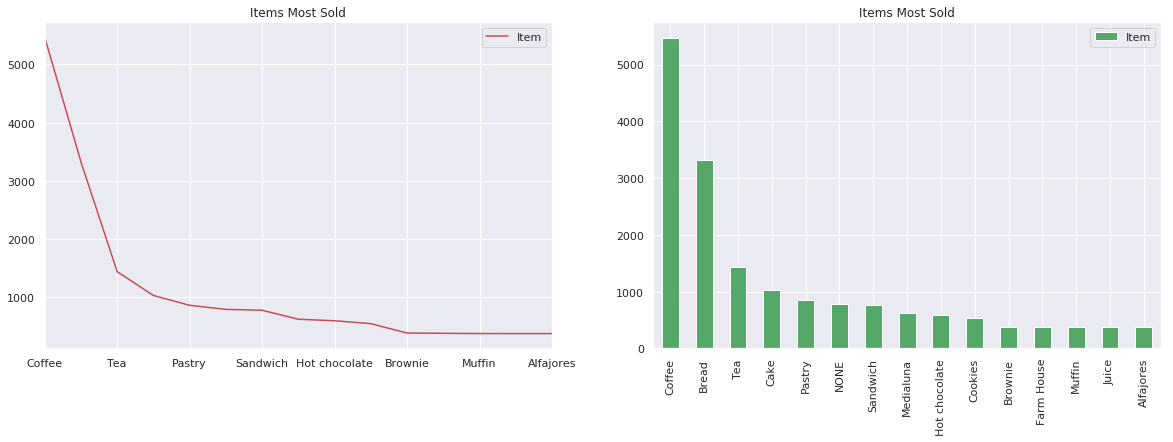

In [39]:
#plt.plot(most_sold)
plt.figure(figsize=(20,6))

#Line chart
plt.subplot(1,2,1)
most_sold.plot(kind='line' , color = 'r')
plt.title('Items Most Sold')
plt.legend()

#Bar chart
plt.subplot(1,2,2)
most_sold.plot(kind='bar', color = 'g')
plt.title('Items Most Sold')
plt.legend()
plt.show()

In [42]:
print('length =' , df['Transaction'].nunique())
df['Transaction'].unique()

length = 9531


array([   1,    2,    3, ..., 9682, 9683, 9684])

In [43]:
df.groupby('Month')['Transaction'].nunique()

Month
01    1598
02    1630
03    1768
04     510
10     175
11    2154
12    1696
Name: Transaction, dtype: int64

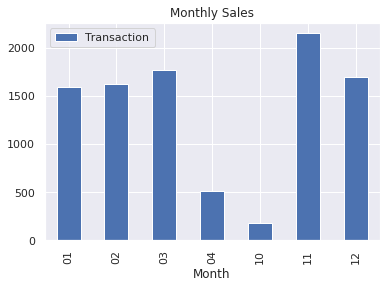

In [45]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.legend()
plt.show()

In [46]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


#Now apply Market Basket Analysis algorithm
`association_rules are most important in finding the best set of products . `        
, `apriori algorithm is used for market baset analysis.`

In [0]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [48]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
        
        
print(len(transaction_list))

9531


In [0]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [50]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
30,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
18,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
25,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
0,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
17,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
23,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
27,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
7,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
29,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310


` We clearly see meaningful results here from our analysis shown above, where the higher the lift value, the stronger the correlation between the items.`
>Toast ---> Coffee    
Pastry -> Bread      
Cake -> Tea                    
(Coffee + Tea) -> Cake     
Sandwhich -> Tea                
Hot Chocolate -> Cake    

#when we don't have Item value as NONE

In [83]:
df = df[df['Item'] != 'NONE']
unique_items = len(df['Item'].unique())
print('Unique items sold: ' + str(unique_items))

Unique items sold: 94


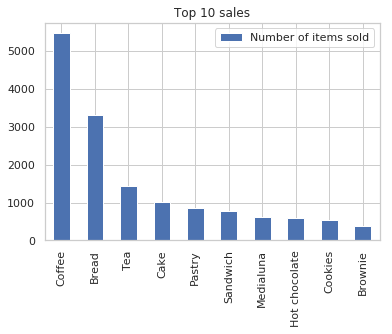

In [84]:
sns.set(style = 'whitegrid')
sales = df['Item'].value_counts()
f = sales[:10].plot.bar(title = 'Top 10 sales')
f.legend(['Number of items sold'])

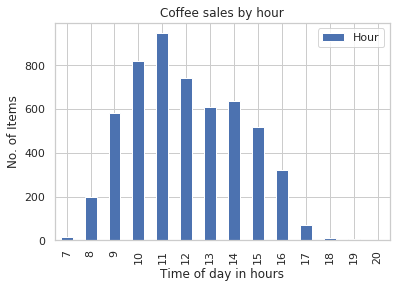

In [62]:
coffee_sales = df[df['Item'] == 'Coffee']
coffee_times = coffee_sales['Hour'].value_counts().sort_index()
f = coffee_times.plot.bar(title = 'Coffee sales by hour')
f.set_xlabel('Time of day in hours')
f.set_ylabel('No. of Items')
f.legend()

In [87]:
print("coffee sale :" , sales[0])

coffee sale : 5471


In [85]:
frequent_items = sales[1:10] 
frequent_items

Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

In [90]:
curr_sales = df[df['Item'] == 'Bread']
curr_sales['Hour'].value_counts().sort_index()

1       1
7       2
8     171
9     400
10    508
11    528
12    474
13    340
14    341
15    310
16    196
17     46
18      6
19      2
Name: Hour, dtype: int64

11    528
10    508
12    474
9     400
14    341
13    340
15    310
16    196
8     171
17     46
18      6
19      2
7       2
1       1
Name: Hour, dtype: int64
14    233
15    207
12    183
13    181
11    176
10    156
16    126
9     103
17     41
8      21
18      5
19      3
Name: Hour, dtype: int64
14    182
15    174
11    133
12    127
16    124
13    124
10     83
9      40
17     30
8       8
Name: Hour, dtype: int64
10    203
9     191
11    151
12     97
8      57
14     49
13     48
15     32
16     16
17      8
18      2
7       2
Name: Hour, dtype: int64
13    234
14    171
12    162
15     75
11     53
16     29
10     20
9      17
8       5
17      4
18      1
Name: Hour, dtype: int64
10    125
9     120
11    108
12     55
14     48
8      43
13     36
15     34
16     25
17     11
7       6
18      4
19      1
Name: Hour, dtype: int64
11    91
15    89
10    76
16    71
14    68
12    56
9     56
13    51
17    14
8      9
18     4
19     3
21     2
Name: Hour, d

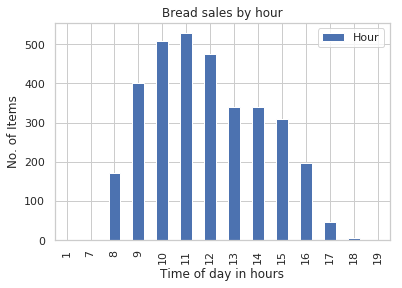

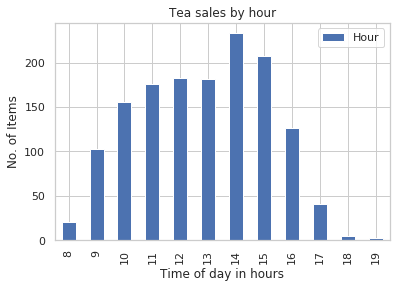

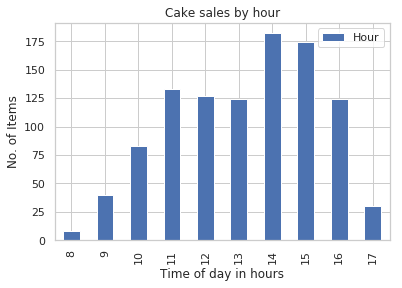

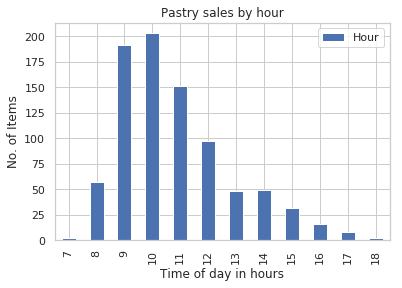

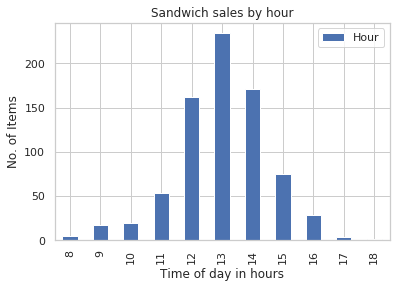

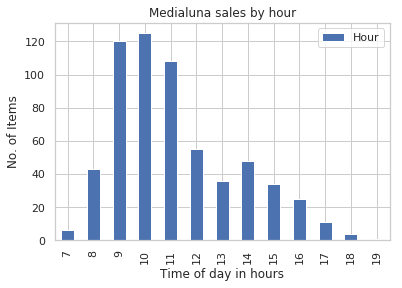

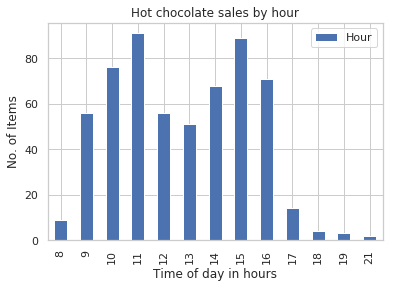

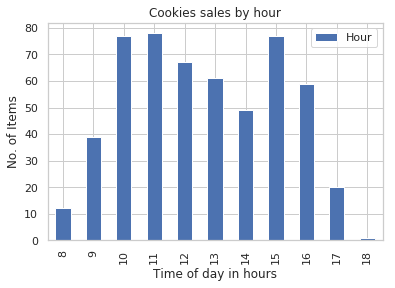

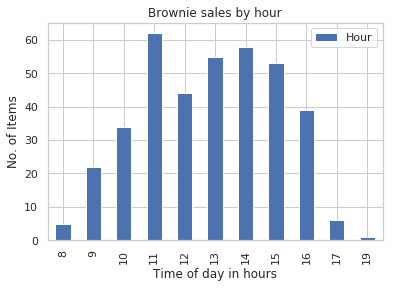

In [91]:
#skip coffee
for item in frequent_items.index:
    plt.figure()
    curr_sales = df[df['Item'] == item]
    curr_times = curr_sales['Hour'].value_counts().sort_index()
    print(curr_sales['Hour'].value_counts())
    f = curr_times.plot.bar(title = (item + ' sales by hour'))
    f.set_xlabel('Time of day in hours')
    f.set_ylabel('No. of Items')
    f.legend()

In [65]:
pd.to_datetime(df['Date']).dt

In [69]:
print(len(pd.to_datetime(df['Date']).dt.weekday_name))
print(np.unique(pd.to_datetime(df['Date']).dt.weekday_name.values))
pd.to_datetime(df['Date']).dt.weekday_name.value_counts()

20507
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


Saturday     4605
Friday       3124
Sunday       3095
Thursday     2646
Tuesday      2392
Monday       2324
Wednesday    2321
Name: Date, dtype: int64

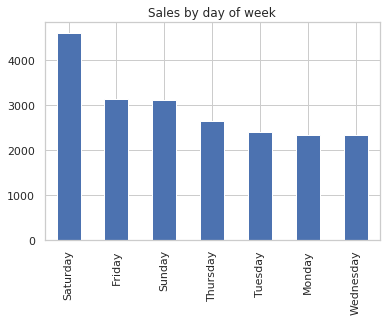

In [64]:
df['Day_of_week'] = pd.to_datetime(df['Date']).dt.weekday_name
sales_by_day = df['Day_of_week'].value_counts()

sales_by_day.plot.bar(title = 'Sales by day of week')

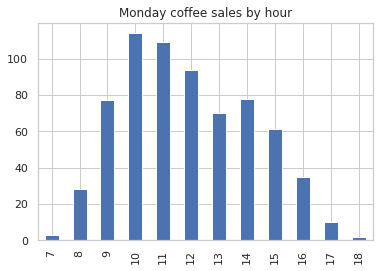

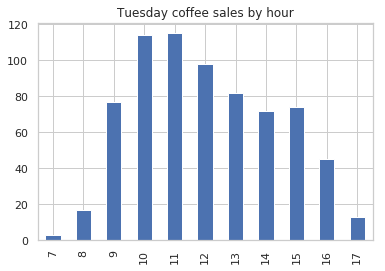

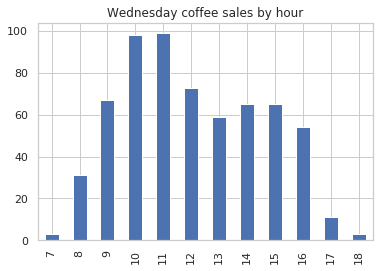

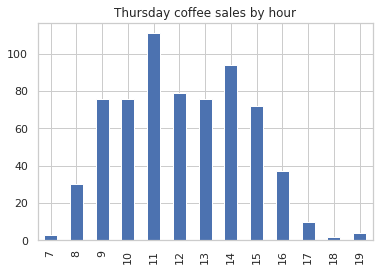

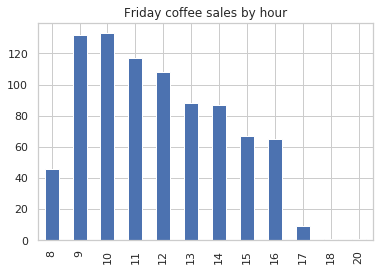

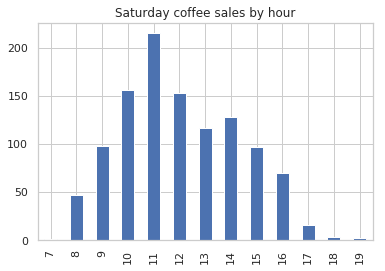

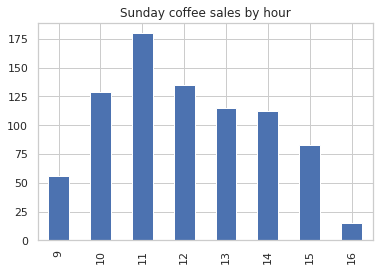

In [71]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_coffee = df[df['Item'] == 'Coffee']

for day in weekdays:
    plt.figure()
    curr_sales = df_coffee[df_coffee['Day_of_week'] == day]
    curr_times = curr_sales['Hour'].value_counts().sort_index()
    curr_times.plot.bar(title = (day + ' coffee sales by hour'))

In [95]:
pd.DataFrame(df.groupby(by = ['Year', 'Month']))

,0,1
0,"(2016, 10)",Date Transaction Ite...
1,"(2016, 11)",Date Transaction ...
2,"(2016, 12)",Date Transaction Item ...
3,"(2017, 01)",Date Transaction Item...
4,"(2017, 02)",Date Transaction Item...
5,"(2017, 03)",Date Transaction Item...
6,"(2017, 04)",Date Transaction ...


In [96]:
pd.DataFrame(df.groupby(by = ['Year', 'Month'])['Transaction'])

,0,1
0,"(2016, 10)",0 1 1 2 2 2 3 3 4 ...
1,"(2016, 11)",385 178 386 178 387 179 388 ...
2,"(2016, 12)",4992 2368 4993 2369 4994 2369 4995 ...
3,"(2017, 01)",8561 4090 8562 4094 8563 4095 8564...
4,"(2017, 02)",12070 5718 12071 5718 12072 5718 1207...
5,"(2017, 03)",16061 7368 16062 7369 16063 7370 1606...
6,"(2017, 04)",20102 9159 20103 9160 20105 9161 2010...


In [98]:
pd.DataFrame(df.groupby(by = ['Year', 'Month'])['Transaction'].nunique())

Transaction
Year Month             
2016 10             175
     11            2140
     12            1672
2017 01            1575
     02            1630
     03            1764
     04             509

In [101]:
pd.DataFrame(df.groupby(by = ['Year', 'Month'])['Transaction'].nunique().rename('N transactions'))

N transactions
Year Month                
2016 10                175
     11               2140
     12               1672
2017 01               1575
     02               1630
     03               1764
     04                509

In [102]:
transactions_by_month = pd.DataFrame(df.groupby(by = ['Year', 'Month'])['Transaction'].nunique().rename('N transactions')).reset_index()
transactions_by_month

,Year,Month,N transactions
0,2016,10,175
1,2016,11,2140
2,2016,12,1672
3,2017,01,1575
4,2017,02,1630
5,2017,03,1764
6,2017,04,509


In [105]:
transactions_by_month['Date'] = transactions_by_month['Year'] + '-' + transactions_by_month['Month']
transactions_by_month

,Year,Month,N transactions,Date
0,2016,10,175,2016-10
1,2016,11,2140,2016-11
2,2016,12,1672,2016-12
3,2017,01,1575,2017-01
4,2017,02,1630,2017-02
5,2017,03,1764,2017-03
6,2017,04,509,2017-04


[Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04')]

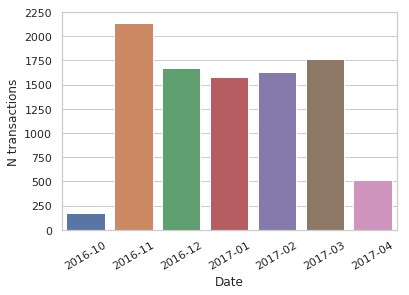

In [106]:
g = sns.barplot('Date', 'N transactions', data = transactions_by_month)
g.set_xticklabels(g.get_xticklabels(), rotation = 30)

[Text(0, 0, '2016-10'),
 Text(0, 0, '2016-11'),
 Text(0, 0, '2016-12'),
 Text(0, 0, '2017-01'),
 Text(0, 0, '2017-02'),
 Text(0, 0, '2017-03'),
 Text(0, 0, '2017-04')]

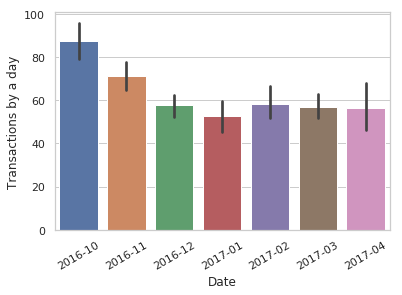

In [108]:
transactions_by_date = pd.DataFrame(df.groupby(by = ['Year', 'Month', 'Day'])['Transaction'].nunique().rename('Transactions by a day')).reset_index()
transactions_by_date['Date'] = transactions_by_date['Year'] + '-' + transactions_by_date['Month']
g = sns.barplot('Date', 'Transactions by a day', data = transactions_by_date)
g.set_xticklabels(g.get_xticklabels(), rotation = 30)

(680, 8)


[Text(0, 0, '12-24'),
 Text(0, 0, '12-27'),
 Text(0, 0, '12-28'),
 Text(0, 0, '12-29'),
 Text(0, 0, '12-30'),
 Text(0, 0, '12-31')]

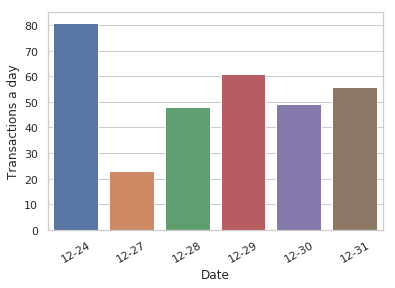

In [74]:
df_holidays = df[df['Month'] == '12']
df_holidays = df_holidays[df_holidays['Day'].isin(map(str, range(24, 32)))]
print(df_holidays.shape)
holiday_by_date = pd.DataFrame(df_holidays.groupby(by = ['Month', 'Day'])['Transaction'].nunique().rename('Transactions a day')).reset_index()
holiday_by_date['Date'] = holiday_by_date['Month'] + '-' + holiday_by_date['Day']
g = sns.barplot('Date', 'Transactions a day', data = holiday_by_date)
g.set_xticklabels(g.get_xticklabels(), rotation = 30)

#Now apply Market Basket Analysis algorithm

In [75]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
        
        
print(len(transaction_list))

9465


In [111]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets,
                          metric='lift',
                          min_threshold=1.0)

rules.sort_values('confidence', ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


#Lift is the key you should look up to

In [110]:
rules.sort_values('lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
10,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
11,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
30,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
37,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
36,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


>Pastry -> Bread         
Cake -> Tea                        
(Coffee + Tea) -> Cake        
Sandwhich -> Tea                 
Hot Chocolate -> Cake          
Toast ---> Coffee     